In [1]:
# import necessary packages
import openeo

# connect with the backend
eoconn = openeo.connect(
        "openeofed.dataspace.copernicus.eu"
        ).authenticate_oidc()

Authenticated using refresh token.


In [2]:
# Setup process parameters
aoi = {
        "type": "Polygon",
        "coordinates": [
          [
            [
              5.179324150085449,
              51.2498689148547
            ],
            [
              5.178744792938232,
              51.24672597710759
            ],
            [
              5.185289382934569,
              51.24504696935156
            ],
            [
              5.18676996231079,
              51.245342479161295
            ],
            [
              5.187370777130127,
              51.24918393390799
            ],
            [
              5.179324150085449,
              51.2498689148547
            ]
          ]
        ]
      }
date = ["2018-06-27","2018-06-27"]

In [ ]:
# Create a processing graph from the SAVI process using an active openEO connection
savi = eoconn.datacube_from_process(
      "savi",
       namespace= "https://raw.githubusercontent.com/VITObelgium/openeo_algorithm_catalog/refs/heads/feature_branch1/savi/openeo_udp/savi.json",
       temporal_extent=date,
       spatial_extent=aoi
       )

In [4]:
savi_job = savi.create_job(title="SAVI_example_job")
savi_job.start_and_wait()

0:00:00 Job 'cdse-j-2511181255174c189777a99d6f5ff410': send 'start'
0:00:14 Job 'cdse-j-2511181255174c189777a99d6f5ff410': created (progress 0%)
0:00:19 Job 'cdse-j-2511181255174c189777a99d6f5ff410': created (progress 0%)
0:00:25 Job 'cdse-j-2511181255174c189777a99d6f5ff410': created (progress 0%)
0:00:33 Job 'cdse-j-2511181255174c189777a99d6f5ff410': created (progress 0%)
0:00:43 Job 'cdse-j-2511181255174c189777a99d6f5ff410': created (progress 0%)
0:00:56 Job 'cdse-j-2511181255174c189777a99d6f5ff410': running (progress N/A)
0:01:11 Job 'cdse-j-2511181255174c189777a99d6f5ff410': running (progress N/A)
0:01:31 Job 'cdse-j-2511181255174c189777a99d6f5ff410': running (progress N/A)
0:01:55 Job 'cdse-j-2511181255174c189777a99d6f5ff410': finished (progress 100%)


<BatchJob job_id='cdse-j-2511181255174c189777a99d6f5ff410'>

In [5]:
results = savi_job.get_results()
results.download_files("output/savi/")

[PosixPath('output/savi/openEO_2018-06-27Z.tif'),
 PosixPath('output/savi/job-results.json')]

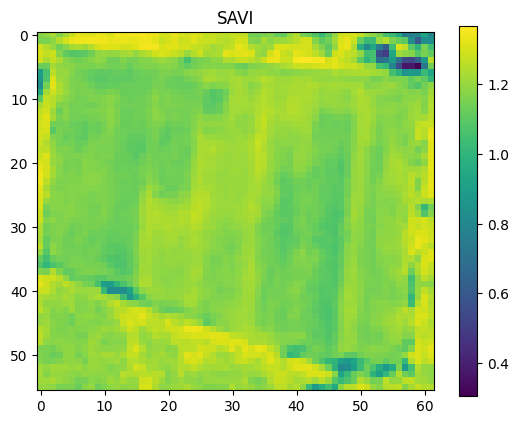

In [6]:
import rasterio
import matplotlib.pyplot as plt

img = rasterio.open("output/savi/openEO_2018-06-27Z.tif")
#plot the first band
plt.imshow(img.read(1))
plt.colorbar()
plt.title("SAVI")
plt.show()